# Red Wine Quality Prediction

Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [3]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [126]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore
from imblearn import under_sampling, over_sampling
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn import metrics


In [128]:
df = pd.read_csv("Redwine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [129]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [130]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [132]:
df.shape

(1599, 12)

In [133]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [134]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [135]:
df.skew() 

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

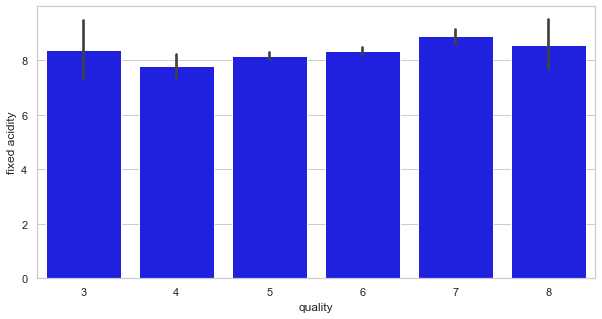

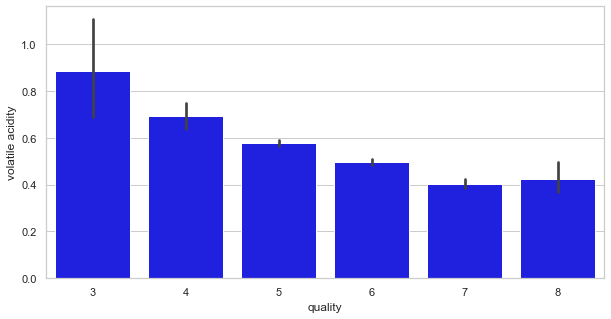

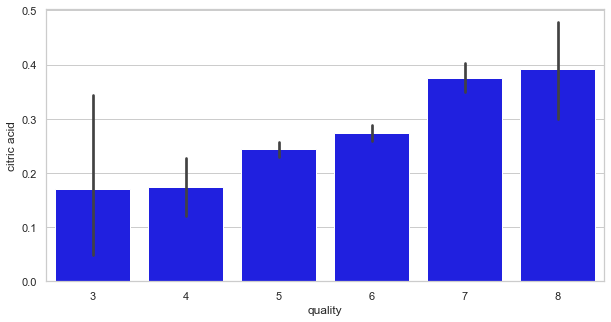

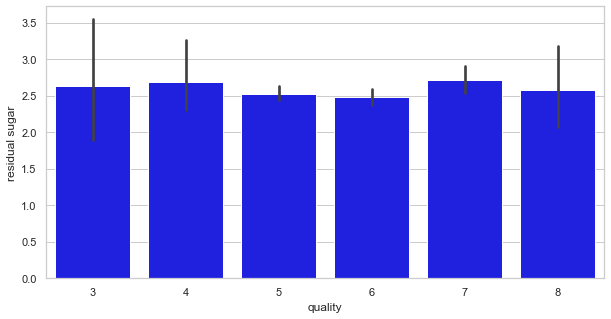

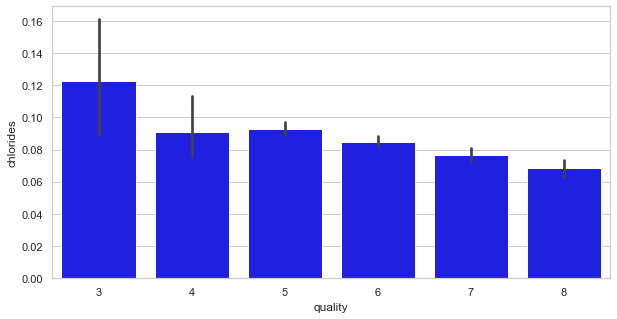

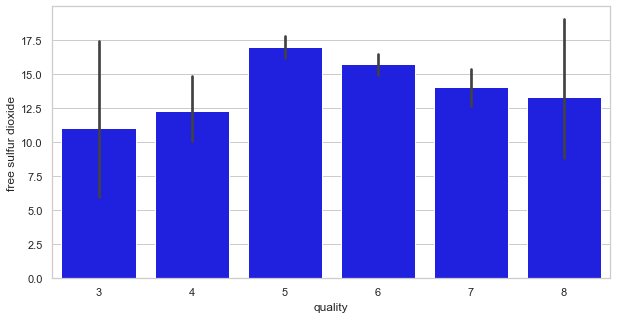

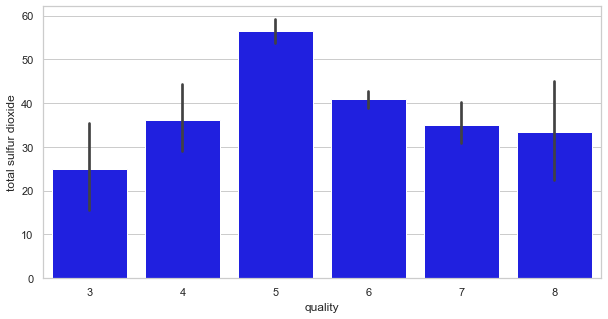

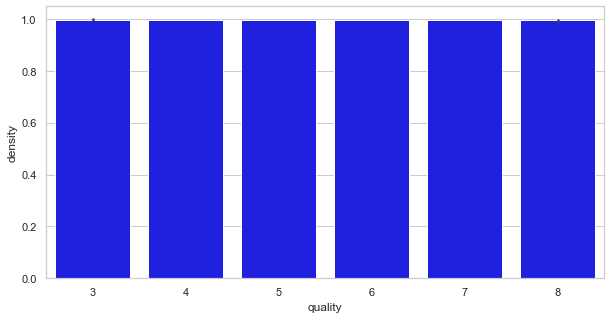

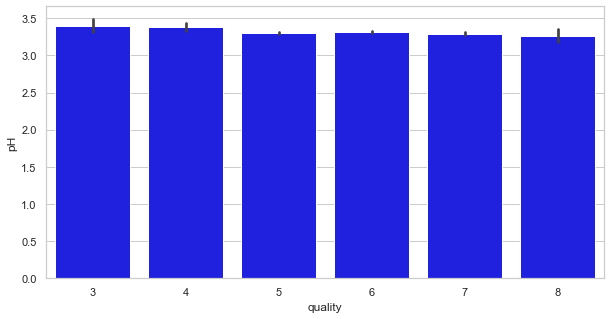

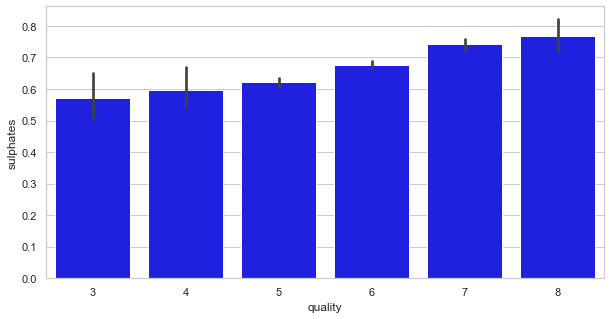

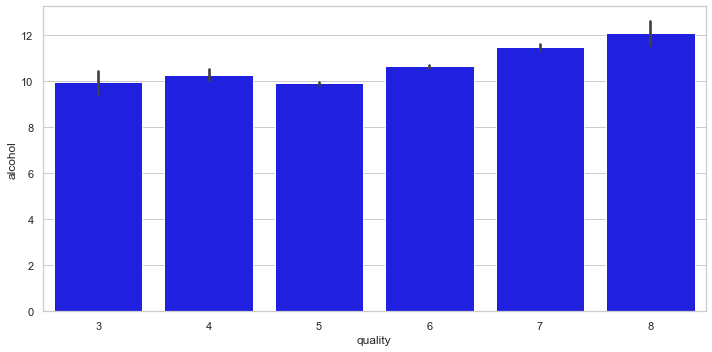

In [136]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="blue")
plt.tight_layout()
plt.show()

In [137]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

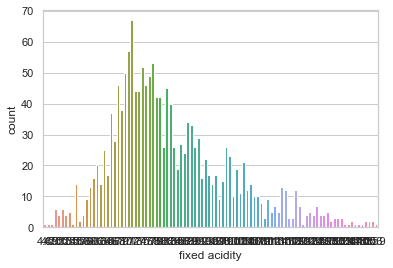

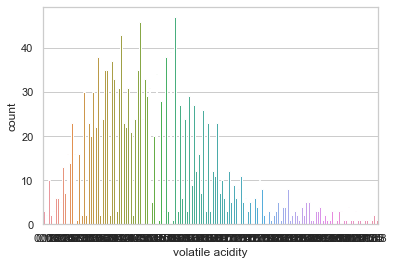

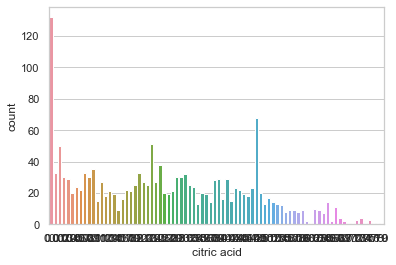

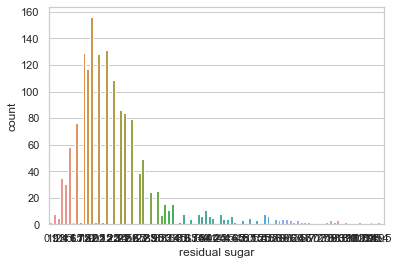

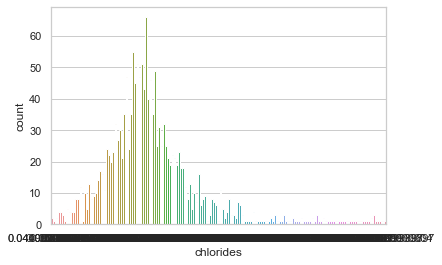

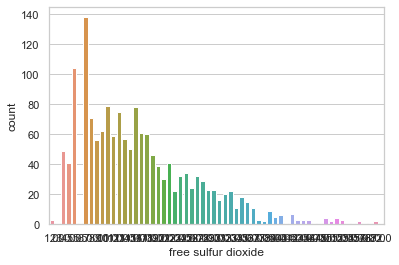

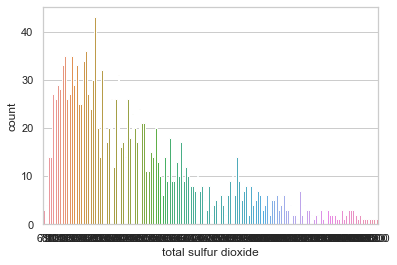

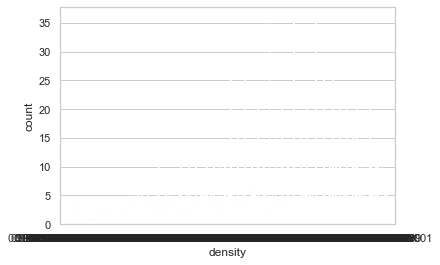

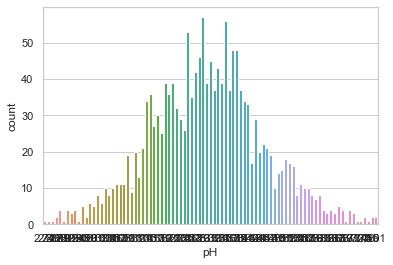

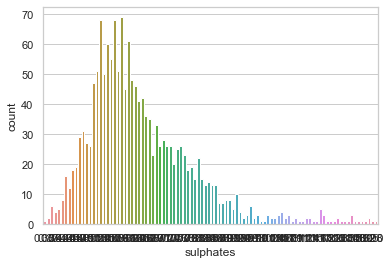

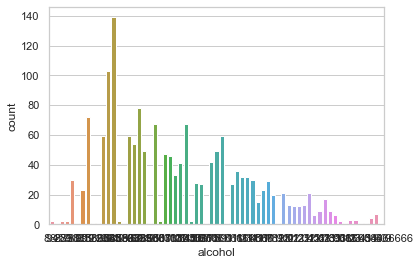

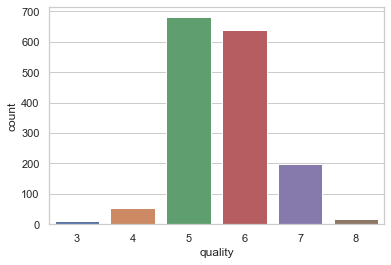

In [138]:
for i in df.columns:
    plt.figure()
    sns.countplot(df[i])
    sns.set(style='whitegrid')

# Boxplot

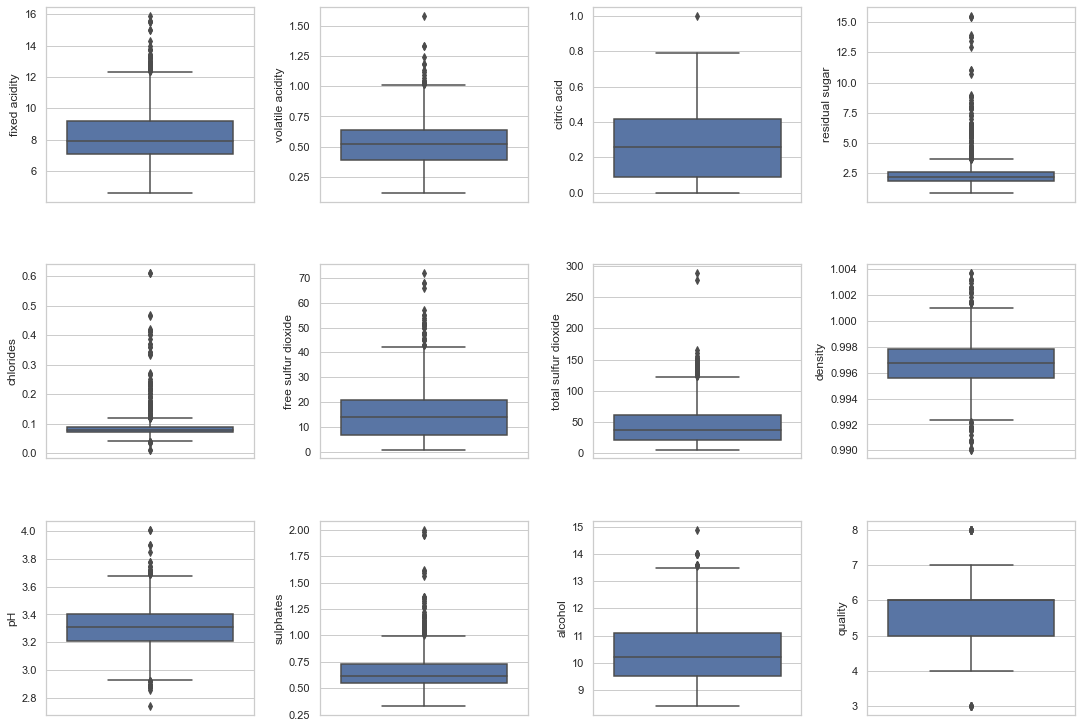

In [139]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

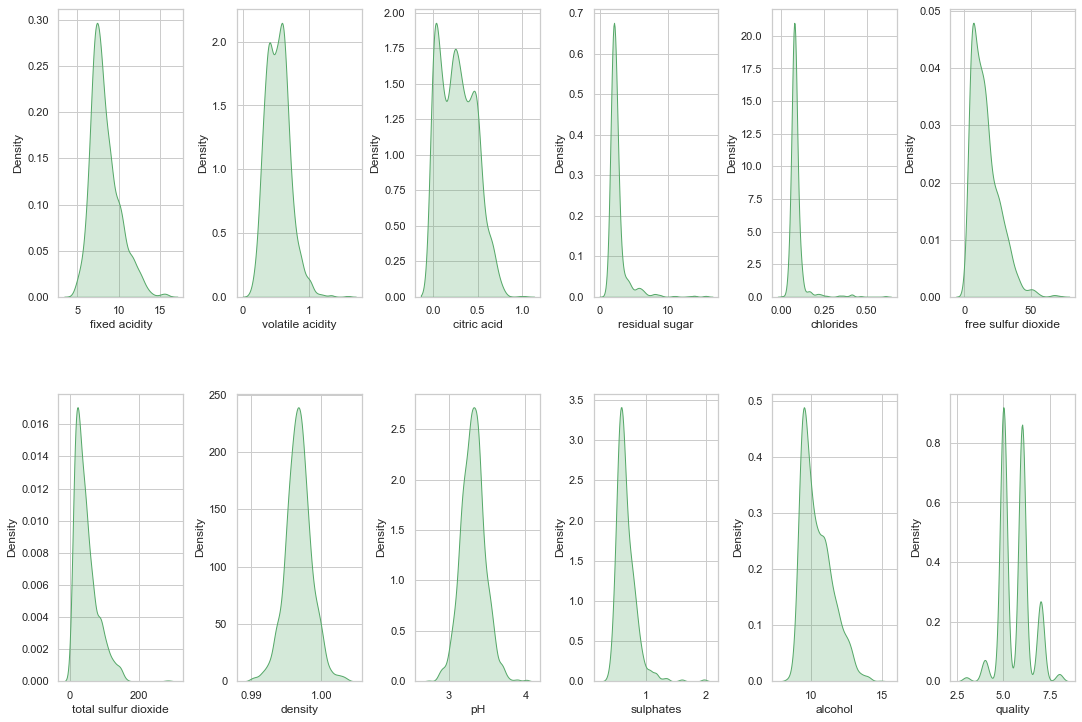

In [140]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [141]:
df=df.drop('residual sugar', axis=1)
df=df.drop('chlorides', axis=1)
df

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [142]:
corr=df.corr()
corr

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
free sulfur dioxide,-0.153794,-0.010504,-0.060978,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.061668,-0.202288,0.109903,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000,0.476166
quality,0.124052,-0.390558,0.226373,-0.050656,-0.185100,-0.174919,-0.057731,0.251397,0.476166,1.000000


# Correlation using a Heatmap
Positive correlation and Negative correlation 

<AxesSubplot:>

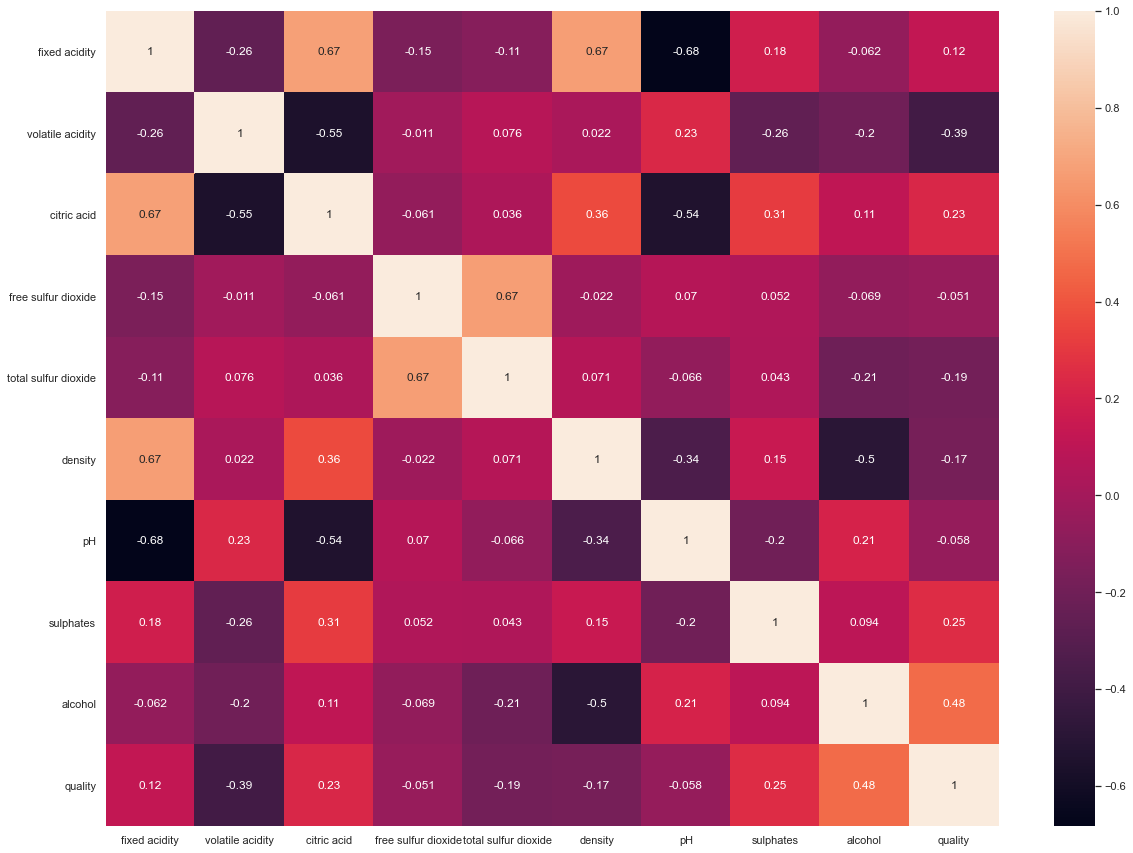

In [143]:
plt.figure(figsize=(20,15))
sns.heatmap(data=corr,annot=True)

In [144]:
# Z score method

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [145]:
# Percentage of Data Loss
data_loss=(1599-1464)/1599*100 
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss

8.442776735459661

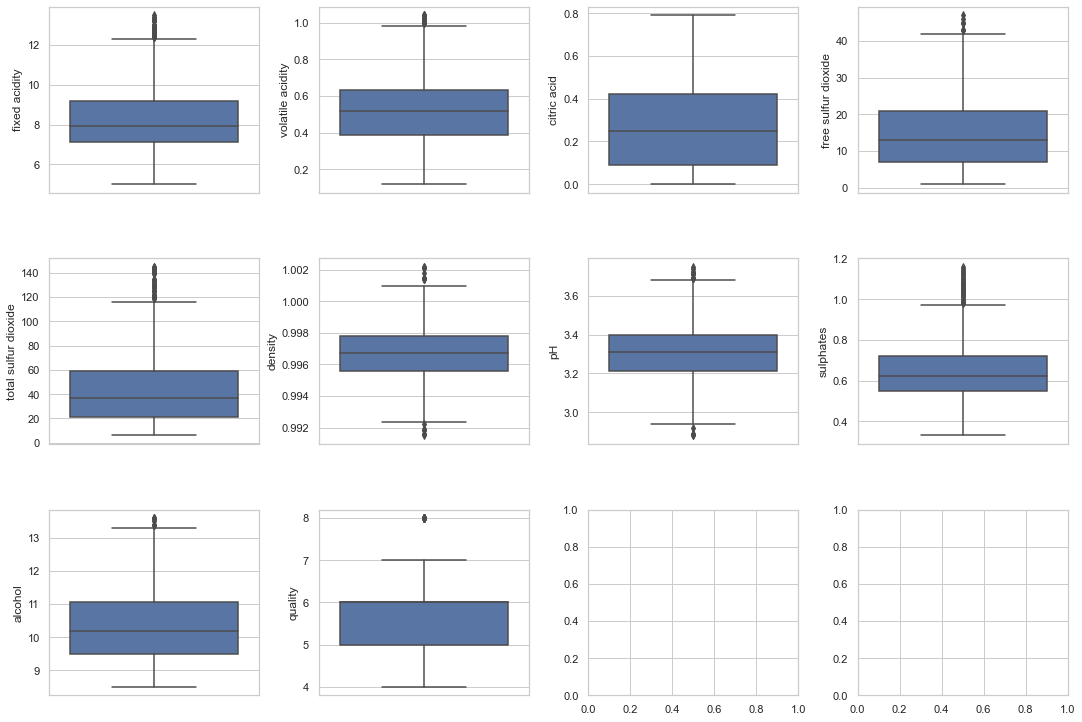

In [146]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

# Model Preparation

Splitting the dataset in X and Y 


In [147]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [148]:
X

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,32.0,44.0,0.99547,3.57,0.71,10.2


In [149]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1486, dtype: int64

In [150]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [151]:
X

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...
3160,9.913886,0.386549,0.589751,6.000000,17.540933,0.997049,3.168933,0.857793,12.159793
3161,11.158031,0.556114,0.636874,5.763384,18.290153,0.998421,3.203437,0.680535,12.832122
3162,10.395452,0.548168,0.614131,8.394392,23.788784,0.998401,3.254586,0.735227,13.240374
3163,7.700788,0.517914,0.142086,29.783502,39.791385,0.994175,3.405434,0.730079,12.377562


In [152]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
3160    8
3161    8
3162    8
3163    8
3164    8
Name: quality, Length: 3165, dtype: int64

In [153]:
Y.value_counts()


7    633
5    633
8    633
6    633
4    633
Name: quality, dtype: int64


# Label Binarization
Function to perform the transform operation of LabelBinarizer with fixed classes.


In [154]:
Y = Y.apply(lambda y_value:1 if y_value>=6 else 0) # 1 is for good quality and 0 for not good quality here y_value>=6 are goo quality
Y 

0       0
1       0
2       0
3       1
4       0
       ..
3160    1
3161    1
3162    1
3163    1
3164    1
Name: quality, Length: 3165, dtype: int64

# Feature Scaling
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1


In [155]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')
X

array([[-0.66029529,  1.06566241, -1.58145606, ...,  1.52075679,
        -0.77737047, -1.34471674],
       [-0.36518403,  1.76392666, -1.58145606, ..., -0.70925404,
         0.19663718, -0.89242246],
       [-0.36518403,  1.31703656, -1.3580922 , ..., -0.25427321,
        -0.02952679, -0.89242246],
       ...,
       [ 1.17274867,  0.32626878,  1.54795042, ..., -0.29484364,
         0.58640932,  1.91041647],
       [-0.4365757 ,  0.15807521, -0.80269684, ...,  0.80096245,
         0.55144759,  1.34868253],
       [ 0.3414304 , -0.50575516,  0.56151784, ...,  0.2167806 ,
         0.2315667 ,  0.77994722]])

In [156]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.66029529,  1.06566241, -1.58145606, ...,  1.52075679,
        -0.77737047, -1.34471674],
       [-0.36518403,  1.76392666, -1.58145606, ..., -0.70925404,
         0.19663718, -0.89242246],
       [-0.36518403,  1.31703656, -1.3580922 , ..., -0.25427321,
        -0.02952679, -0.89242246],
       ...,
       [ 1.17274867,  0.32626878,  1.54795042, ..., -0.29484364,
         0.58640932,  1.91041647],
       [-0.4365757 ,  0.15807521, -0.80269684, ...,  0.80096245,
         0.55144759,  1.34868253],
       [ 0.3414304 , -0.50575516,  0.56151784, ...,  0.2167806 ,
         0.2315667 ,  0.77994722]])

In [157]:
from sklearn.model_selection  import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [158]:
lg=LogisticRegression()

In [159]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 26 score is well
test score 84.20221169036336
train score 84.20221169036336
Random state 46 score is well
test score 84.04423380726699
train score 84.04423380726699
Random state 54 score is well
test score 83.88625592417061
train score 83.88625592417061
Random state 85 score is well
test score 84.04423380726699
train score 83.9652448657188


# Training and Test Data


We will separate our data into a training set and a test set . This is a very standard approach in Machine Learning.

Here we will find the good quality wine using different features

In [160]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [161]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
nb=MultinomialNB()

In [162]:
param={'kernel':['linear','rbf','poly','sigmoid']}
gd=GridSearchCV(svc,param,cv=5)
gd.fit(X,Y)
print(gd.best_params_)

{'kernel': 'rbf'}


In [163]:
param={'criterion':['ginny','entropy'],'splitter':['best','random'],'max_features':['none','auto','sqrt','log2']}
gd=GridSearchCV(dtc,param)
gd.fit(X,Y)
print(gd.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}


In [164]:
param={'n_neighbors':[7,5,11],'weights':['uniform','distance'],'algorithm':['auto','bell_tree','kd_tree','brute']}
gd=GridSearchCV(knn,param)
gd.fit(X,Y)
print(gd.best_params_)

{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}


In [165]:
lr = LogisticRegression()
lr.fit(X,Y)

LogisticRegression()

In [166]:
svc=SVC(kernel='linear')
dtc=DecisionTreeClassifier(criterion='entropy',max_features='log2',splitter='random')
knn=KNeighborsClassifier(n_neighbors=11,weights='distance',algorithm='auto')


In [167]:
rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X,Y)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [168]:
trcf_model=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }

In [169]:
trcf_model = RandomizedSearchCV(trcf_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)
trcf_model.fit(X,Y)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(10, 100, 10),
                                        'n_estimators': range(10, 100, 10)},
                   scoring='accuracy')

In [170]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred))

In [171]:
fun(svc)

Accuracy Score 0.8483412322274881
Confusion Matrix
 [[211  36]
 [ 60 326]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       247
           1       0.90      0.84      0.87       386

    accuracy                           0.85       633
   macro avg       0.84      0.85      0.84       633
weighted avg       0.85      0.85      0.85       633

F1 score 0.8716577540106952


In [172]:
fun(dtc)

Accuracy Score 0.8483412322274881
Confusion Matrix
 [[201  46]
 [ 50 336]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       247
           1       0.88      0.87      0.88       386

    accuracy                           0.85       633
   macro avg       0.84      0.84      0.84       633
weighted avg       0.85      0.85      0.85       633

F1 score 0.875


In [173]:
fun(lr)

Accuracy Score 0.8578199052132701
Confusion Matrix
 [[207  40]
 [ 50 336]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       247
           1       0.89      0.87      0.88       386

    accuracy                           0.86       633
   macro avg       0.85      0.85      0.85       633
weighted avg       0.86      0.86      0.86       633

F1 score 0.8818897637795275


In [174]:
fun(knn)

Accuracy Score 0.9131121642969984
Confusion Matrix
 [[227  20]
 [ 35 351]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       247
           1       0.95      0.91      0.93       386

    accuracy                           0.91       633
   macro avg       0.91      0.91      0.91       633
weighted avg       0.92      0.91      0.91       633

F1 score 0.927344782034346


In [64]:
fun(nb)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [175]:
fun(lg)

Accuracy Score 0.8578199052132701
Confusion Matrix
 [[207  40]
 [ 50 336]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       247
           1       0.89      0.87      0.88       386

    accuracy                           0.86       633
   macro avg       0.85      0.85      0.85       633
weighted avg       0.86      0.86      0.86       633

F1 score 0.8818897637795275


In [176]:
fun(rf)


Accuracy Score 0.9020537124802528
Confusion Matrix
 [[220  27]
 [ 35 351]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       247
           1       0.93      0.91      0.92       386

    accuracy                           0.90       633
   macro avg       0.90      0.90      0.90       633
weighted avg       0.90      0.90      0.90       633

F1 score 0.9188481675392671


In [177]:
fun(trcf_model)

Accuracy Score 0.8894154818325435
Confusion Matrix
 [[216  31]
 [ 39 347]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       247
           1       0.92      0.90      0.91       386

    accuracy                           0.89       633
   macro avg       0.88      0.89      0.88       633
weighted avg       0.89      0.89      0.89       633

F1 score 0.9083769633507853


#  Plot the ROC Curves for comparision


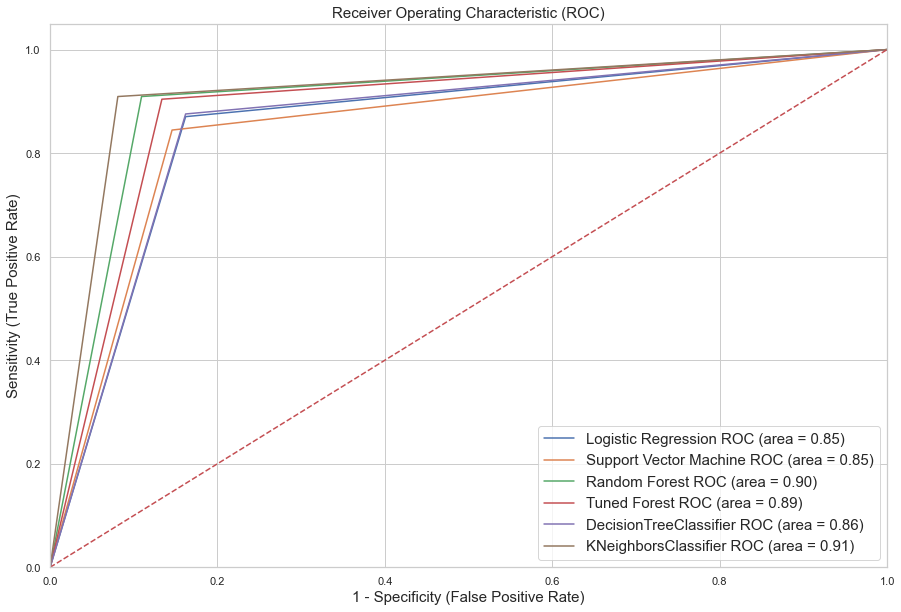

In [178]:
plt.figure(figsize=(15,10))
models = [
{
    'label': 'Logistic Regression',
    'model': lr,
},
{
    'label': 'Support Vector Machine',
    'model': svc,
},
{
    'label': 'Random Forest',
    'model': rf,
},
{
    'label': 'Tuned Forest', 
    'model': trcf_model,
},
{
    'label': 'DecisionTreeClassifier',
    'model': dtc,
},   
{
    'label': 'KNeighborsClassifier',
    'model': knn,
}
]

for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test)
    fpr,tpr,thersholds=roc_curve(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred)
    plt.plot(fpr, tpr,label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=15)

# Confusion Matrix¶


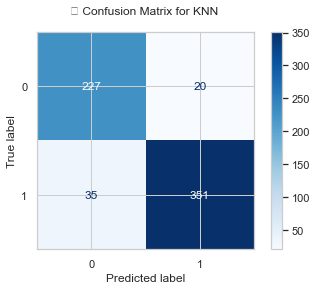

In [179]:
class_names = df.columns
#metrics.plot_confusion_matrix(knn, x_test, y_test)
metrics.plot_confusion_matrix(knn, x_test, y_test,cmap=plt.cm.Blues)
plt.title('\t Confusion Matrix for KNN \n')
plt.show()

# Model Saving
KNN is giving best results compare to others so we will create model using KNN. 

In [180]:
import pickle
filename='Wine_predDTKNN.pkl'
pickle.dump(knn,open(filename,'wb'))

      Actual  Predict
351        1        1
1160       0        0
853        0        0
1538       0        0
3008       1        1
...      ...      ...
2396       1        1
2812       1        1
1364       0        0
2912       1        1
3012       1        1

[633 rows x 2 columns]


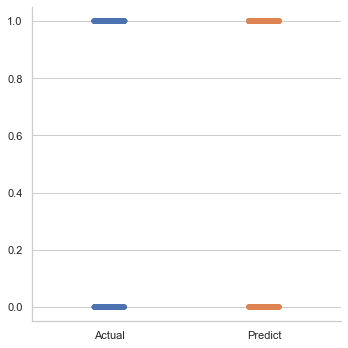

In [181]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=knn.predict(x_test)

print(res)
sns.catplot(data=res)